# Pandas knjižnjica

Pandas je open-source knjižnjica zgrajena na NumPy, in namenjena hitri analizi podatkov, pa tudi vizualizaciji. Delamo lahko s podatkih iz različnih virov.


# DataFrames

DataFrames je temeljni objekt za zapis podatkov. Lahko si ga predstavljamo kot tabelo v excelu. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Uporabili bomo naklj.stevila za generiranje tabele.
from numpy.random import randn
np.random.seed(101)

In [3]:
# Kreiraj data frame: podatki, indeksi vrstic, indeksi stolpcev
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [4]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Izbira podatkov, manipulacije podatkov


In [5]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [6]:
# izbira več stopcev
wz = df[['W','Z']]
wz

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [7]:
# Poskusite spremeniti vrednosti v wz. Kaj se zgodi?
wz['W'].loc['A'] = 0.0
""" This warning indicates that you might be trying to modify a view of the DataFrame rather than the original DataFrame."""


C:\Users\user\AppData\Local\Temp\ipykernel_21540\4199637830.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  wz['W'].loc['A'] = 0.0
C:\Users\user\AppData\Local\Temp\ipykernel_21540\4199637830.py:2: SettingWithCopyWarning: 
A value is tryi

' This warning indicates that you might be trying to modify a view of the DataFrame rather than the original DataFrame.'

**Nov stolpec v tabeli:**

In [8]:
df['new'] = df['W'] + df['Y']
df


,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


** Odstranjevanje **

In [9]:
# vrne novo tabelo brez tega stolpca
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [10]:
# Preveri, ali je bil stolpec odstranjen iz df. Kako ga odstraniš ?
df = df.drop('new',axis=1)


In [11]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Odstranitev vrstice:

In [12]:
# axis 0 pomeni indekse vrstic.
df.drop('E',axis=0)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


Izbira vrstic : loc (location) je lastnost ki vrne stolpec kot serijo**

In [13]:
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [14]:
# Izberi 2. vrstico z iloc
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [15]:
#df.loc['B','Y']

In [16]:
#df.loc[['A','B'],['W','Y']]

### Izbira s pogojem



In [17]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [18]:
#df>0

In [19]:
# Kaj vrne ukaz?
df = df[df>0]
#tabelo brez vrednosti pod nula
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [20]:
# Generiraj dataframe, ki vsebuje samo vrstice, kjer so vrednosti v stolpcu W pozitivne.
data = {
    'A': [1, 2, 3, 4, 5],
    'W': [-1, 2, -3, 4, 5],
    'C': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

positive_w_df = df[df['W'] > 0]

positive_w_df.set_index('A', inplace=True)

print(positive_w_df)



   W   C
A       
2  2  20
4  4  40
5  5  50


# Uvoz podatkov
Podatke lahko beremo iz csv, Excela, SQL..

In [21]:
# Uvozimo podatke iz datoteke v data frame
df1 = pd.read_csv('df1',index_col=0)

In [22]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [23]:
#df2 = pd.read_csv('df2')
#df2

In [24]:
# Izračuni z numpy primer:
arrA = df1['A'].to_numpy()
print(arrA.shape)
eA = np.exp(arrA)
df1['eA'] = eA
df1


(1000,)


,A,B,C,D,eA
2000-01-01,1.339091,-0.163643,-0.646443,1.041233,3.815574
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382,0.460711
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638,0.398106
2000-01-04,-1.738808,-0.072973,0.056517,0.015085,0.175730
2000-01-05,-0.905980,1.778576,0.381918,0.291436,0.404146
...,...,...,...,...,...
2002-09-22,1.013897,-0.288680,-0.342295,-0.638537,2.756320
2002-09-23,-0.642659,-0.104725,-0.631829,-0.909483,0.525892
2002-09-24,0.370136,0.233219,0.535897,-1.552605,1.447931
2002-09-25,0.183339,1.285783,-1.052593,-2.565844,1.201222


In [25]:
# Naloga:  v stolpec SumSQ zapiši vsoto kvadratov stolpca A in stolpca B (sumSQ= A^2 + B^2)

# Vizualizacija podatkov vgrajena v Pandas

Najprej moramo uvoziti :


In [26]:
import numpy as np
import pandas as pd
%matplotlib inline

## Izris grafa
Na izbranih podatkih iz data frame lahko narisemo graf, s klicem metode.
Npr. histogram.
Kličemo metodo plot, in potem kind='hist'

<Axes: >

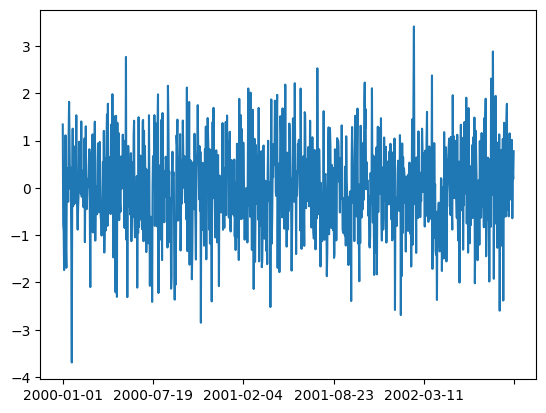

In [27]:
df1['A'].plot()

<Axes: ylabel='Frequency'>

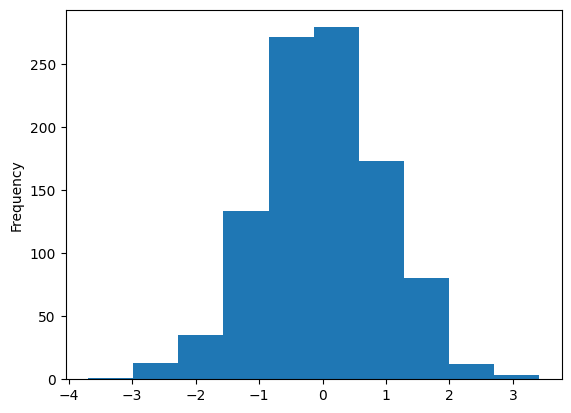

In [28]:
df1['A'].plot(kind='hist')

Lepši izris: style sheets

Matplotlib knjižnjica (http://matplotlib.org/gallery.html#style_sheets) vsebuje stile za izris: 
plot_bmh, plot_fivethirtyeight, plot_ggplot.
Uporaba stilov:


In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Axes: >

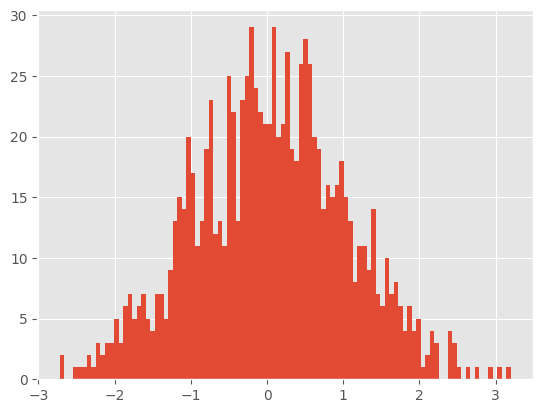

In [30]:
# Direktno klicemo hist
df1['B'].hist(bins = 100)

In [31]:
# NALOGA: Preskusi opcije metode hist, npr. večje število stolpcev (bins)
#


# Tipi grafov

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie


In [1]:
df[df>0, 'A'].plot.area(alpha=0.4)

NameError: name 'df' is not defined

In [152]:
df2.plot.bar()

### Scatter plot
povemo x in y podatke

<Axes: xlabel='A', ylabel='B'>

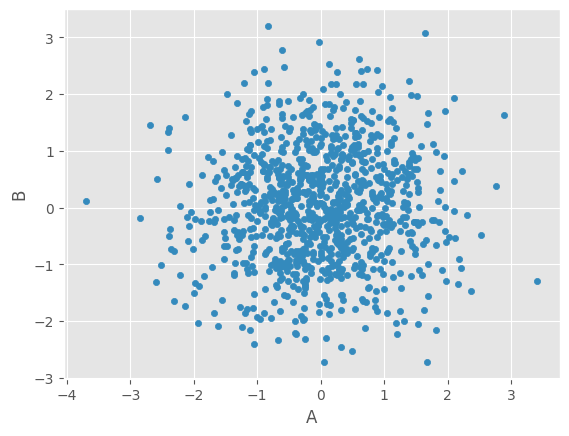

In [176]:
df1.plot.scatter(x='A',y='B')

<Axes: xlabel='A', ylabel='B'>

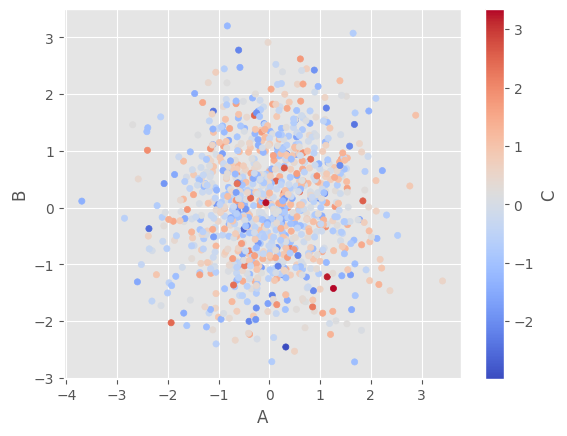

In [177]:
# Preglej in komentiraj opcije
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

### Box plot: 
statistika vrednosti 

<Axes: >

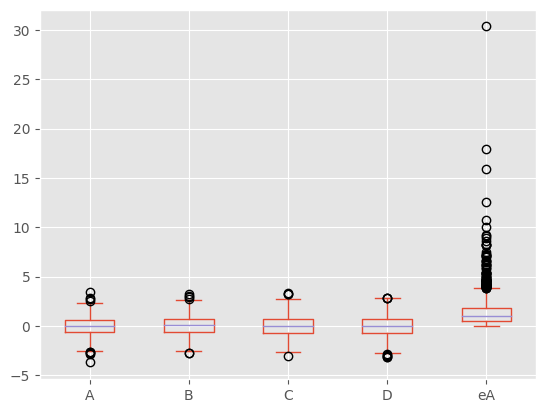

In [178]:
# Odgovori, kaj pomeni izris kvadrata in črt v box plotu?
df1.plot.box()

### Kernel density estimation: KDE
Porazdelitev vrednosti v tabeli

In [180]:
df1['a'].plot.kde()
df1['A'].plot.kde()

KeyError: 'a'

<Axes: ylabel='Density'>

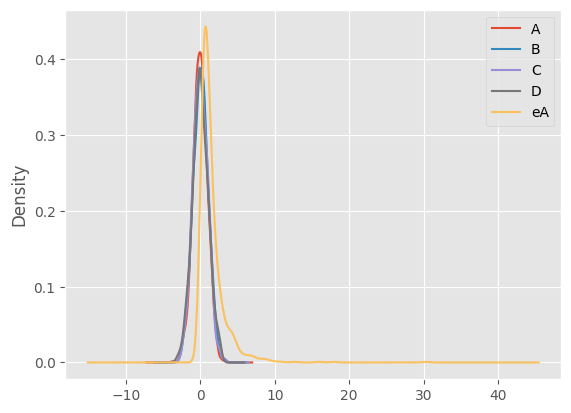

In [181]:
df1.plot.density()

# Podatki covid dataset


### Izris grafov
Preizkusi risanje različnih grafov z pridobljenimi podatki. S pomočjo izbire podatkov izberi iz tabele del podatkov (posamezne stolpce, izbrane vrstice, več ali vse stolpce - serije) in jih izriši.

Preizkusi različne tipe grafov in njihove opcije (nastavitve, parametre). Preglej pomoč glede nastavitev (opcij).

V poročilu podaj slike grafov, kodo, in komentar (nastavitve, namen).

In [183]:
cdata = pd.read_excel('covid-data.xlsx')
cdata.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
1,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
4,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,7.1,51.2,NaN,2.89,78.57,0.795,-190.8,-4.34,2.88,-66.836912


In [184]:
unique_iso_codes = cdata['iso_code'].unique()
print(unique_iso_codes)


['ALB' 'AND' 'AUT' 'BLR' 'BEL' 'BIH' 'BGR' 'HRV' 'CYP' 'CZE' 'DNK' 'EST'
 'FRO' 'FIN' 'FRA' 'DEU' 'GIB' 'GRC' 'GGY' 'HUN' 'ISL' 'IRL' 'IMN' 'ITA'
 'JEY' 'OWID_KOS' 'LVA' 'LIE' 'LTU' 'LUX' 'MLT' 'MDA' 'MCO' 'MNE' 'NLD'
 'MKD' 'NOR' 'POL' 'PRT' 'ROU' 'RUS' 'SMR' 'SRB' 'SVK' 'SVN' 'ESP' 'SWE'
 'CHE' 'UKR' 'GBR' 'VAT']


In [185]:
sloI = cdata['iso_code'] == 'SVN'
sloData = cdata[sloI]
print(sloData.head())


      iso_code continent  location        date  total_cases  new_cases  \
41400      SVN    Europe  Slovenia  2020-02-02          NaN        NaN   
41401      SVN    Europe  Slovenia  2020-02-03          NaN        NaN   
41402      SVN    Europe  Slovenia  2020-02-04          NaN        NaN   
41403      SVN    Europe  Slovenia  2020-02-05          NaN        NaN   
41404      SVN    Europe  Slovenia  2020-02-06          NaN        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
41400                 NaN           NaN         NaN                  NaN  ...   
41401                 NaN           NaN         NaN                  NaN  ...   
41402                 NaN           NaN         NaN                  NaN  ...   
41403                 NaN           NaN         NaN                  NaN  ...   
41404                 NaN           NaN         NaN                  NaN  ...   

       female_smokers  male_smokers  handwashing_facilities  \
41400

C:\Users\zf73000\AppData\Local\Temp\ipykernel_7116\3758034488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sloData['date'] = pd.to_datetime(sloData['date'])


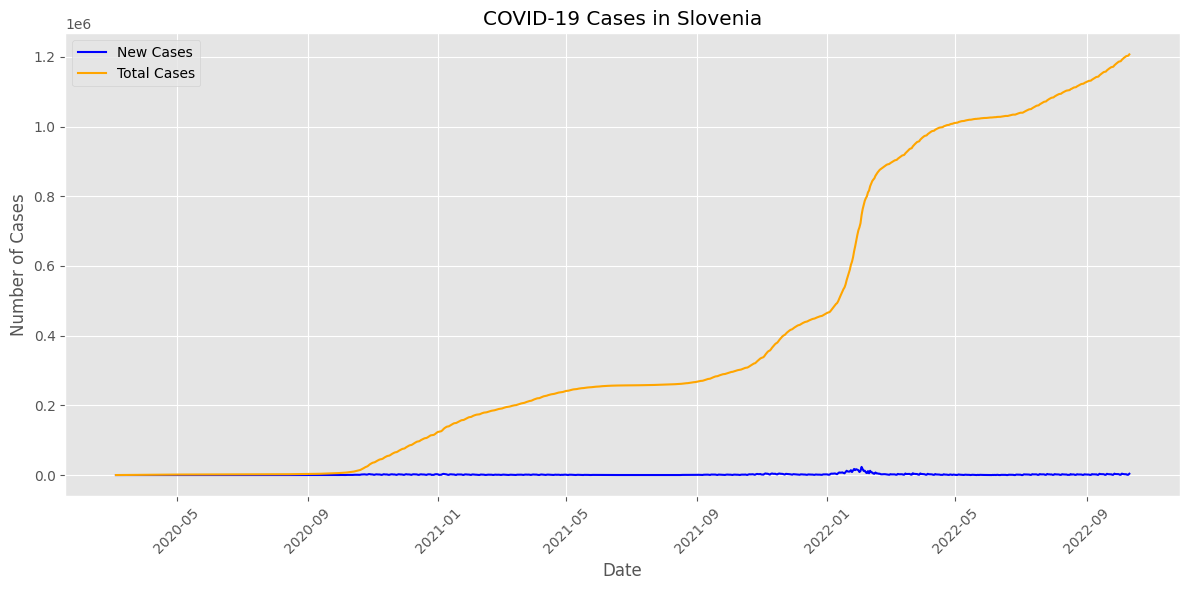

In [187]:
# Ensure the date column is in datetime format
sloData['date'] = pd.to_datetime(sloData['date'])

# Plotting the time series graph
plt.figure(figsize=(12, 6))

# Plot new cases
plt.plot(sloData['date'], sloData['new_cases'], label='New Cases', color='blue')

# Plot total cases
plt.plot(sloData['date'], sloData['total_cases'], label='Total Cases', color='orange')

# Adding titles and labels
plt.title('COVID-19 Cases in Slovenia')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



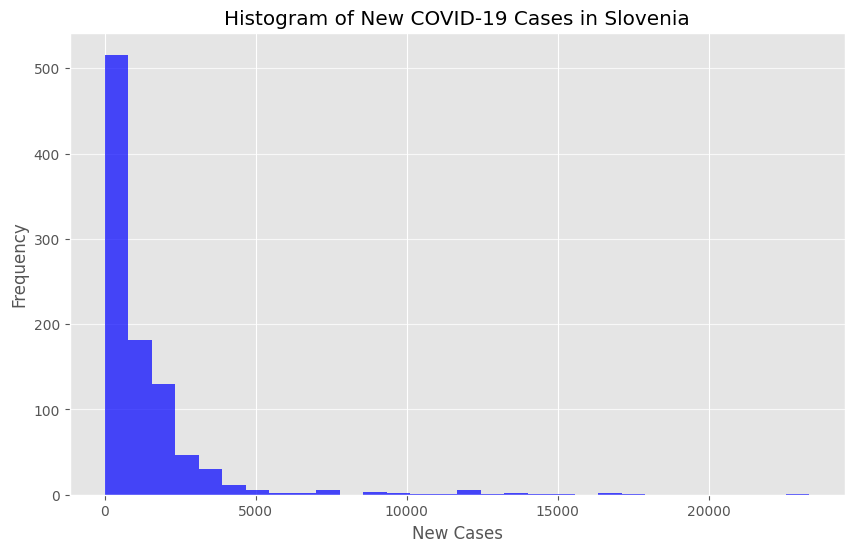

In [192]:
plt.figure(figsize=(10, 6))
plt.hist(sloData['new_cases'].dropna(), bins=30, color='blue', alpha=0.7)  # Drop NaN values for the histogram
plt.title('Histogram of New COVID-19 Cases in Slovenia')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



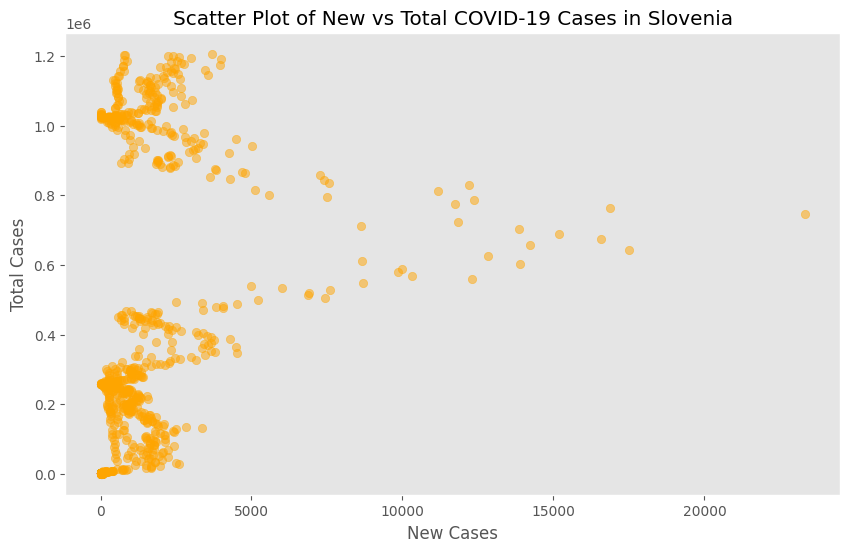

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(sloData['new_cases'].dropna(), sloData['total_cases'].dropna(), alpha=0.5, color='orange')
plt.title('Scatter Plot of New vs Total COVID-19 Cases in Slovenia')
plt.xlabel('New Cases')
plt.ylabel('Total Cases')
plt.grid()
plt.show()


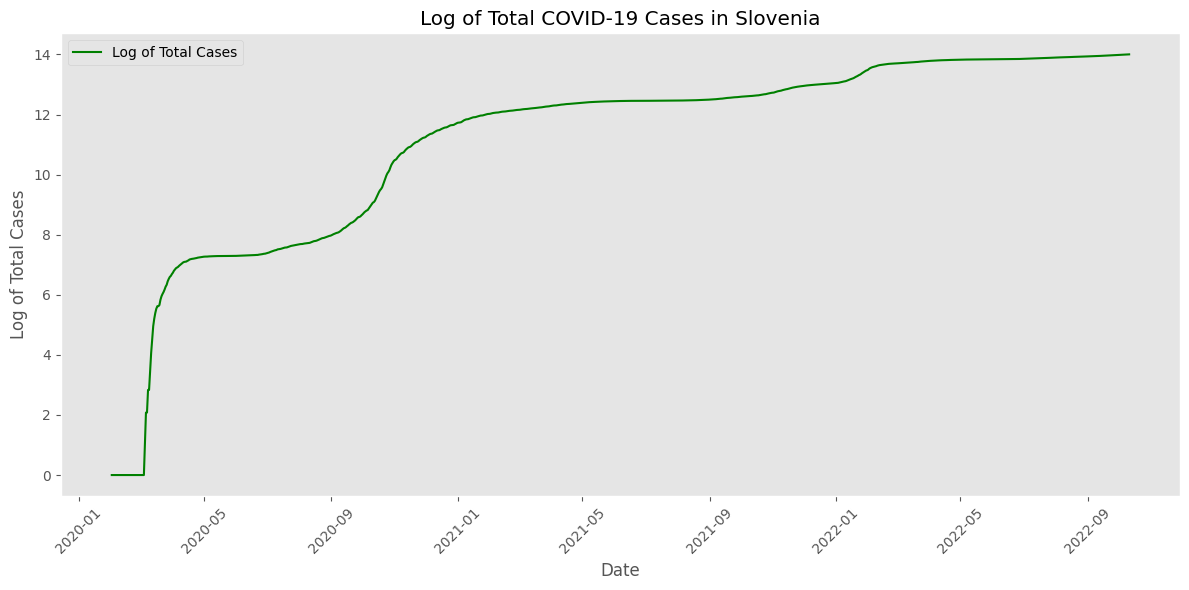

In [195]:
import numpy as np  # Ensure numpy is imported

# Calculate the logarithm of total cases (adding 1 to avoid log(0))
# Use .loc to avoid SettingWithCopyWarning
sloData.loc[:, 'log_total_cases'] = np.log(sloData['total_cases'].fillna(0) + 1)

# Plotting the log of total cases
plt.figure(figsize=(12, 6))
plt.plot(sloData['date'].dropna(), sloData['log_total_cases'].dropna(), label='Log of Total Cases', color='green')
plt.title('Log of Total COVID-19 Cases in Slovenia')
plt.xlabel('Date')
plt.ylabel('Log of Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

